In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [15]:
df[['Mg','K','Ba','Fe']]=df[['Mg','K','Ba','Fe']].replace(0,np.nan)

In [17]:
df.isna().sum()

RI        0
Na        0
Mg       42
Al        0
Si        0
K        30
Ca        0
Ba      176
Fe      144
Type      0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
si= SimpleImputer()

In [26]:
df[['Mg','K','Ba','Fe']]=si.fit_transform(df[['Mg','K','Ba','Fe']])

In [28]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [29]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,3.340058,1.444907,72.650935,0.578098,8.956963,0.985789,0.174286,2.780374
std,0.003037,0.816604,0.559016,0.499270,0.774546,0.620389,1.423153,0.323485,0.052698,2.103739
min,1.511150,10.730000,0.330000,0.290000,69.810000,0.020000,5.430000,0.060000,0.010000,1.000000
25%,1.516522,12.907500,3.340058,1.190000,72.280000,0.472500,8.240000,0.985789,0.174286,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.578098,8.600000,0.985789,0.174286,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.985789,0.174286,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [31]:
x=df.iloc[:,:-1]
y=df['Type']

In [33]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 8.72867646e-01,  2.84953261e-01,  2.06190481e+00, ...,
        -1.45766340e-01,  4.61961319e-18,  3.73532980e-17],
       [-2.49333469e-01,  5.91817180e-01,  4.66089105e-01, ...,
        -7.93733762e-01,  4.61961319e-18,  3.73532980e-17],
       [-7.21318056e-01,  1.49933137e-01,  3.76436537e-01, ...,
        -8.28949383e-01,  4.61961319e-18,  3.73532980e-17],
       ...,
       [ 7.54046351e-01,  1.16872135e+00, -1.98621991e-16, ...,
        -3.64103189e-01,  2.02712178e+00,  3.73532980e-17],
       [-6.12398536e-01,  1.19327046e+00, -1.98621991e-16, ...,
        -3.35930692e-01,  1.81022138e+00,  3.73532980e-17],
       [-4.14363045e-01,  1.00915211e+00, -1.98621991e-16, ...,
        -2.37326954e-01,  2.12007910e+00,  3.73532980e-17]])

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.2)

In [53]:
def model_predict(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    print('Training Score: ',model.score(xtrain,ytrain))
    print('Testing Score: ',model.score(xtest,ytest))
    print(classification_report(ytest,ypred))

In [54]:
model_predict(KNeighborsClassifier(n_neighbors=5))

Training Score:  0.7777777777777778
Testing Score:  0.6511627906976745
              precision    recall  f1-score   support

           1       0.68      0.68      0.68        19
           2       0.53      0.75      0.62        12
           3       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.65        43
   macro avg       0.70      0.74      0.72        43
weighted avg       0.59      0.65      0.62        43



In [58]:
trainac=[]
testsc=[]
for i in range(1,30):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(xtrain,ytrain)
    ypred=kn.predict(xtest)
    trainac.append(kn.score(xtrain,ytrain))
    testsc.append(kn.score(xtest,ytest))    

In [59]:
trainac

[1.0,
 0.847953216374269,
 0.8187134502923976,
 0.783625730994152,
 0.7777777777777778,
 0.7602339181286549,
 0.7076023391812866,
 0.7017543859649122,
 0.6666666666666666,
 0.6666666666666666,
 0.672514619883041,
 0.6666666666666666,
 0.6491228070175439,
 0.6549707602339181,
 0.6549707602339181,
 0.6608187134502924,
 0.631578947368421,
 0.6257309941520468,
 0.6198830409356725,
 0.6198830409356725,
 0.5730994152046783,
 0.5555555555555556,
 0.543859649122807,
 0.5380116959064327,
 0.5321637426900585,
 0.5321637426900585,
 0.5146198830409356,
 0.52046783625731,
 0.49122807017543857]

In [60]:
testsc

[0.6976744186046512,
 0.6744186046511628,
 0.6511627906976745,
 0.6744186046511628,
 0.6511627906976745,
 0.6744186046511628,
 0.6511627906976745,
 0.6744186046511628,
 0.6511627906976745,
 0.6511627906976745,
 0.627906976744186,
 0.6744186046511628,
 0.6976744186046512,
 0.6744186046511628,
 0.6976744186046512,
 0.6976744186046512,
 0.6744186046511628,
 0.6976744186046512,
 0.6511627906976745,
 0.627906976744186,
 0.627906976744186,
 0.627906976744186,
 0.627906976744186,
 0.627906976744186,
 0.5813953488372093,
 0.5581395348837209,
 0.5348837209302325,
 0.5348837209302325,
 0.5348837209302325]

Text(0, 0.5, 'Accuracy')

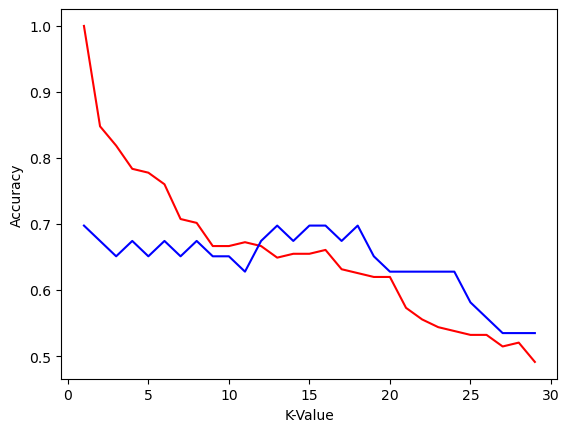

In [74]:
plt.plot(range(1,30),trainac,color='red')
plt.plot(range(1,30),testsc,color='blue')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')

In [73]:
kn=KNeighborsClassifier(n_neighbors=12)
kn.fit(xtrain,ytrain)
ypred=kn.predict(xtest)
print('Training Score: ',kn.score(xtrain,ytrain))
print('Testing Score: ',kn.score(xtest,ytest))
print(classification_report(ytest,ypred))

Training Score:  0.6666666666666666
Testing Score:  0.6744186046511628
              precision    recall  f1-score   support

           1       0.68      0.79      0.73        19
           2       0.60      0.75      0.67        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.67        43
   macro avg       0.55      0.59      0.57        43
weighted avg       0.58      0.67      0.63        43

